绘制PSME数据集的distribution/时间/空间上的流量变化图

# Data Visualization

In [79]:
import os
import sys
PROJECT_DIR = os.path.abspath(os.path.abspath('') + "/..")
sys.path.append(PROJECT_DIR)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 1. Load Data

In [80]:
DATASET_NAME = "PEMS04" 
# PEMS04 01/01/2018 – 02/28/2018 
# file paths
data_file_path = PROJECT_DIR + "/datasets/raw_data/{0}/{0}.npz".format(DATASET_NAME)
# load data
data = np.load(data_file_path)['data']
# for file in data.files:
#     print(file, data[file].shape, data[file].dtype)
print("data shape: {0}".format(data.shape))

data shape: (16992, 307, 3)


## 2. Plot Raw Data

### 2.1 plot raw data of one node

In [81]:
def plot_raw_data(data: np.array, selected_node_id: int, begin_time: int = None, end_time: int = None, title: str=None ,line_width: float = 1.5, font_size: int = 16, color="green", figure_size: tuple = (10, 5)):
    """plot raw data.

    Args:
        data (np.array): raw data with shape [num_time_slices, num_node_series, num_features].
        selected_node_id (int): selected node.
        begin_time (int, optional): begin time. Defaults to None.
        end_time (int, optional): end time. Defaults to None.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        color (str, optional): color. Defaults to "green".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    # plt.clf()
    plt.rcParams['figure.figsize'] = figure_size
    plot_data = data[begin_time:end_time, selected_node_id, 0]
    plot_index = np.arange(plot_data.shape[0])
    plt.plot(plot_index, plot_data, linewidth=line_width, color=color, label="raw data")
    plt.grid()
    plt.title(title)
    plt.legend(fontsize=font_size)
    # plt.savefig('vis.eps',dpi=600,format='eps', transparent=True)
    plt.show()
    plt.clf()
    

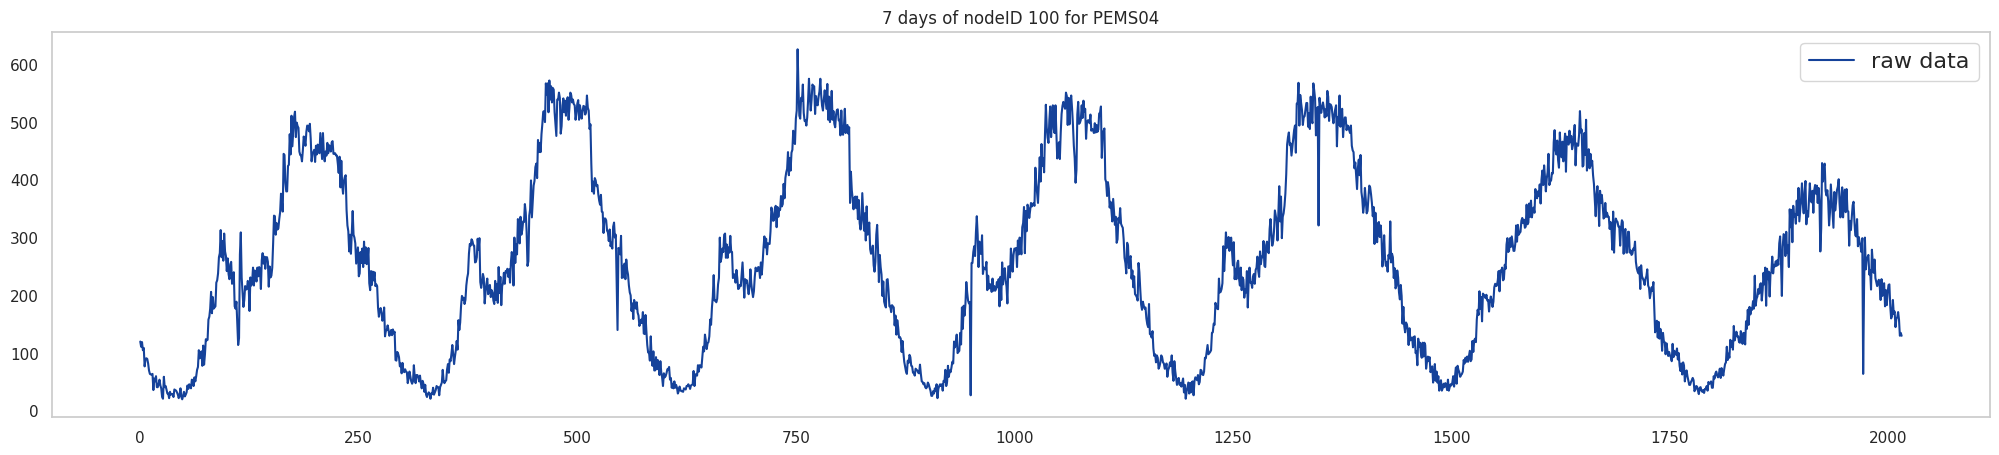

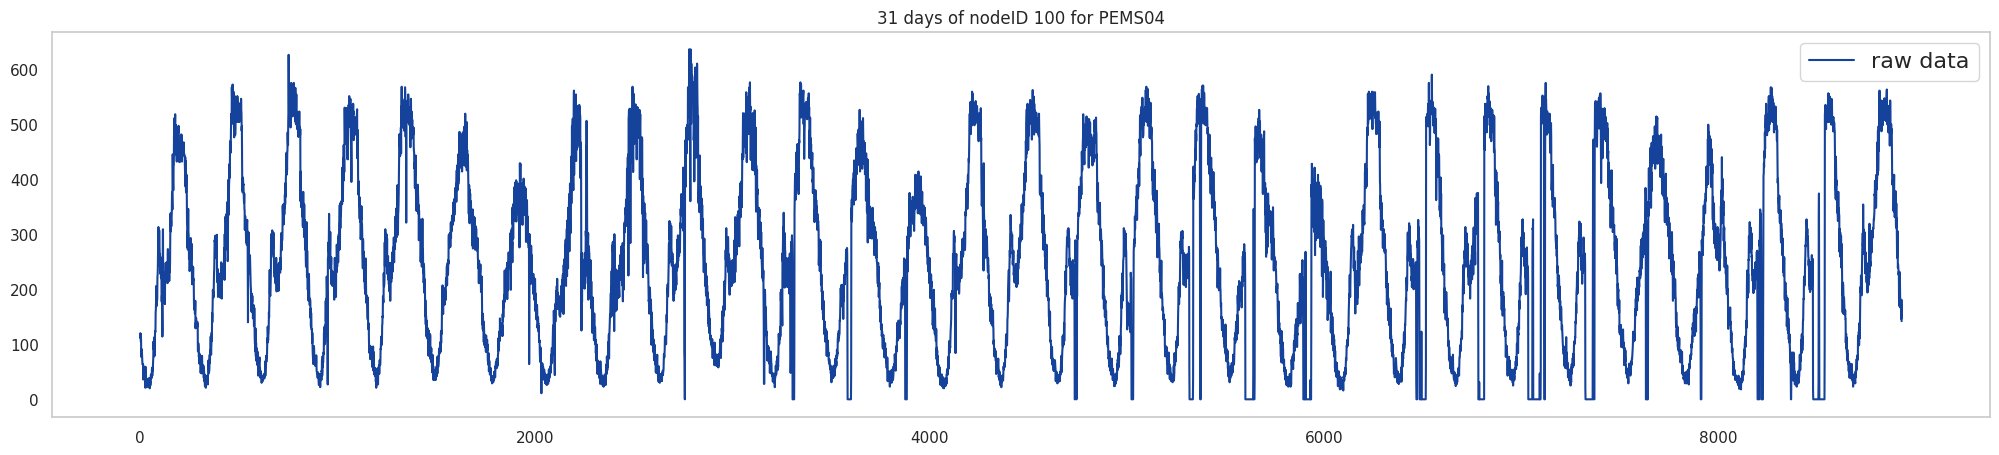

<Figure size 3000x500 with 0 Axes>

In [82]:
DAY_START = 7
DAY_SPAN_1 = 7
DAY_SPAN_2 = 31
NODE_ID = 100
plot_raw_data(data=data, selected_node_id=NODE_ID, begin_time=288*DAY_START, end_time=288*(DAY_START+DAY_SPAN_1), title="{0} days of nodeID {1} for {2}".format(DAY_SPAN_1, NODE_ID, DATASET_NAME), figure_size=(25, 5), line_width=1.5, font_size=16, color="#15429a")
plot_raw_data(data=data, selected_node_id=NODE_ID, begin_time=288*DAY_START, end_time=288*(DAY_START+DAY_SPAN_2), title="{0} days of nodeID {1} for {2}".format(DAY_SPAN_2, NODE_ID, DATASET_NAME), figure_size=(30, 5), line_width=1.5, font_size=16, color="#15429a")

### 2.2 plot distribution of multi nodes

In [83]:
figure_size = (7, 5)
line_width=1.5
font_size=16

In [84]:
import seaborn as sns

def plot_distribution_multi_nodes(data: np.array, node_ids: list, colors: list, title: str = None, line_width: float = 1.5, font_size: int = 16, figure_size: tuple = (10, 5)):
    plt.rcParams['figure.figsize'] = figure_size
    plt.rcParams.update({'font.size': font_size})
    # 设置图表和直方图的样式
    # sns.set(style="whitegrid")
    for idx, node_id in enumerate(node_ids):
        node_data = data[:, node_id, 0]  # 获取第0通道的节点数据
        sns.kdeplot(node_data, bw_adjust=0.5, linewidth=line_width, color=colors[idx], label=f"Sensor {node_id}")
        # sns.histplot(node_data, kde=True, stat="density", linewidth=line_width, color=colors[idx], label=f"Sensor {node_id}")
        plt.legend(loc='upper right', fontsize=font_size)
    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)
    plt.xlabel("Traffic Flows", fontsize=font_size)
    plt.ylabel("Frequency", fontsize=font_size)
    plt.title(title, fontsize=font_size)
    plt.savefig('distribution_plot.pdf', format='pdf', bbox_inches='tight') 
    plt.show()
    plt.clf()

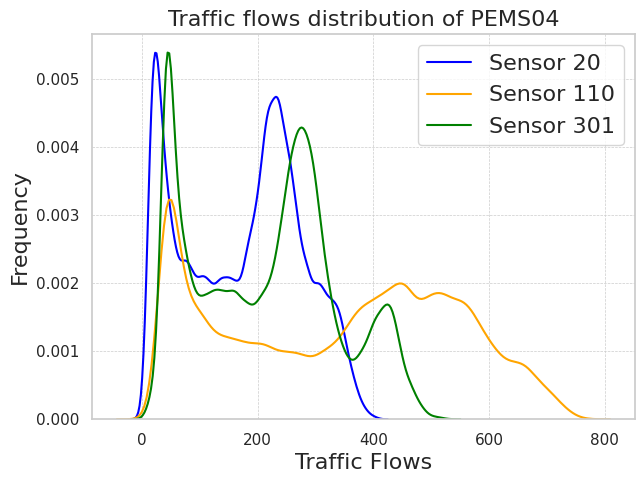

<Figure size 700x500 with 0 Axes>

In [85]:
NODE_IDS = [20, 110, 301]
COLORS = ['blue', 'orange', 'green']
title=f"Traffic flows distribution of {DATASET_NAME}"
plot_distribution_multi_nodes(
    data=data,
    node_ids=NODE_IDS,
    colors=COLORS,
    title=title,
    figure_size=figure_size,
    line_width=line_width,
    font_size=font_size
)

### 2.2 plot raw data of multi nodes

In [86]:
def plot_raw_data_multi_nodes(data: np.array, node_ids: list, colors: list, begin_time: int = None, end_time: int = None, title: str = None, line_width: float = 1.5, font_size: int = 16, figure_size: tuple = (10, 5)):
    plt.rcParams['figure.figsize'] = figure_size
    plt.rcParams.update({'font.size': font_size})
    for idx, selected_node_id in enumerate(node_ids):
        plot_data = data[begin_time:end_time, selected_node_id, 0]
        plot_index = np.arange(plot_data.shape[0])
        plt.plot(plot_index, plot_data, linewidth=line_width, label=f"Sensor {selected_node_id}", color=colors[idx])

    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)
    # Set x-axis ticks every 3 hours with labels formatted as hh:mm
    time_ticks = np.arange(0, (end_time - begin_time) + 1, 36)
    time_labels = ["{:02d}:00".format(i) for i in range(0, 25, 3)]
    plt.xticks(ticks=time_ticks, labels=time_labels)
    plt.xlabel("Time", fontsize=font_size)
    plt.ylabel("Flow", fontsize=font_size)
    plt.legend(loc='upper left', fontsize=font_size)
    plt.title(title, fontsize=font_size)
    plt.savefig('spatial_hetero.pdf', format='pdf', bbox_inches='tight') 
    plt.show()
    plt.clf()

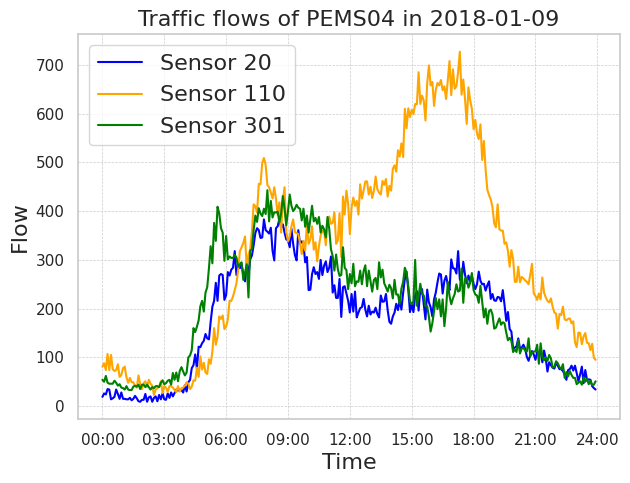

<Figure size 700x500 with 0 Axes>

In [87]:
DAY_START = 8
DAY_SPAN = 1
NODE_IDS = [20, 110, 301]
COLORS = ['blue', 'orange', 'green']
title=f"Traffic flows of {DATASET_NAME} in 2018-01-09"
plot_raw_data_multi_nodes(
    data=data,
    node_ids=NODE_IDS,
    colors=COLORS,
    begin_time=288*DAY_START,
    end_time=288*(DAY_START + DAY_SPAN),
    title=title,
    figure_size=figure_size,
    line_width=line_width,
    font_size=font_size
)


### 2.3 plot raw data of multi days

In [88]:
def plot_raw_data_multi_days(data: np.array, node_id: int, colors: list, begin_time: int = None, day_ids: int = None, day_samples: int = 288, title: str=None , line_width: float = 1.5, font_size: int = 16, figure_size: tuple = (10, 5)):
    plt.rcParams['figure.figsize'] = figure_size
    plt.rcParams.update({'font.size': font_size})
    week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    week_abr = ['Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.', 'Sat.', 'Sun.']
    end_time = begin_time + day_samples
    for idx, selected_day in enumerate(day_ids):
        time_start = begin_time + selected_day*day_samples
        time_end = begin_time + (selected_day+1)*day_samples
        plot_data = data[time_start:time_end, node_id, 0]
        plot_index = np.arange(plot_data.shape[0])
        plt.plot(plot_index, plot_data, linewidth=line_width, label=f"{week_abr[selected_day]}")


    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)
    # Set x-axis ticks every 3 hours with labels formatted as hh:mm
    time_ticks = np.arange(0, (end_time - begin_time) + 1, 36)
    time_labels = ["{:02d}:00".format(i) for i in range(0, 25, 3)]
    plt.xticks(ticks=time_ticks, labels=time_labels)
    plt.xlabel("Time", fontsize=font_size)
    plt.ylabel("Flow", fontsize=font_size)
    plt.legend(loc='upper right', fontsize=font_size)
    plt.title(title, fontsize=font_size)
    plt.savefig('temporal_hetero.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.clf()


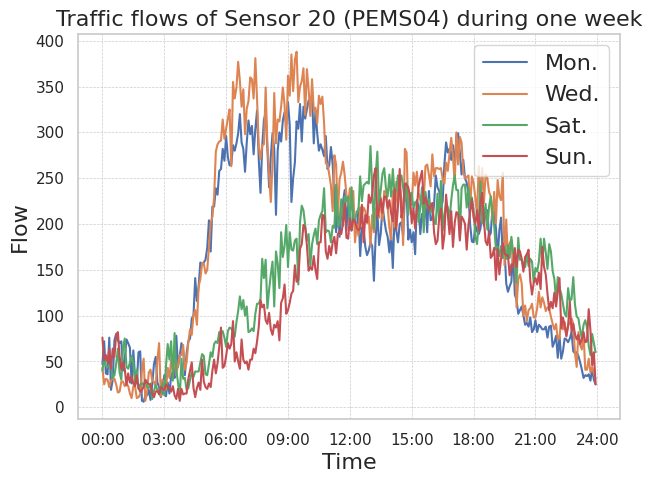

<Figure size 700x500 with 0 Axes>

In [89]:
DAY_START = 7
DAY_IDS = [0,2,5,6]
NODE_ID = 20
COLORS = ['blue', 'orange', 'green', 'red']
title=f"Traffic flows of Sensor 20 ({DATASET_NAME}) during one week"
plot_raw_data_multi_days(
    data=data,
    node_id=NODE_ID,
    colors=COLORS,
    begin_time=288*DAY_START,
    day_ids=DAY_IDS,
    day_samples=288,
    figure_size=figure_size,
    title=title,
    line_width=line_width,
    font_size=font_size
)